# DIGITAL ASSESSMENT 1
                                BASIL JACOB (18BCE0956)
                                   IMAGE PROCESSING     

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
img=cv2.imread('C:\\Users\\DELL\\Documents\\Image_processing_DA\\Image_covid19\\COVID-19 (2).png',0)

# ORIGINAL IMAGE 

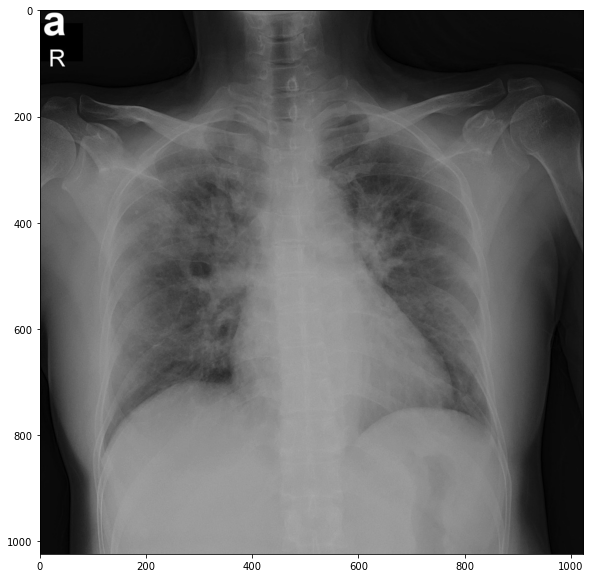

In [4]:
display_img(img)

# LAPLACIAN OF ORIGINAL IMAGE

In [5]:
#Remove noise by blurring with a Gaussian filter

In [6]:
ddepth=cv2.CV_16S
kernel_size=3

In [7]:
src = cv2.GaussianBlur(img, (3, 3), 0)

In [8]:
#Apply laplacian tranformation operator

In [9]:
laplaced_img = cv2.Laplacian(src, ddepth, ksize=kernel_size)

In [10]:
abs_laplaced_img=cv2.convertScaleAbs(laplaced_img)

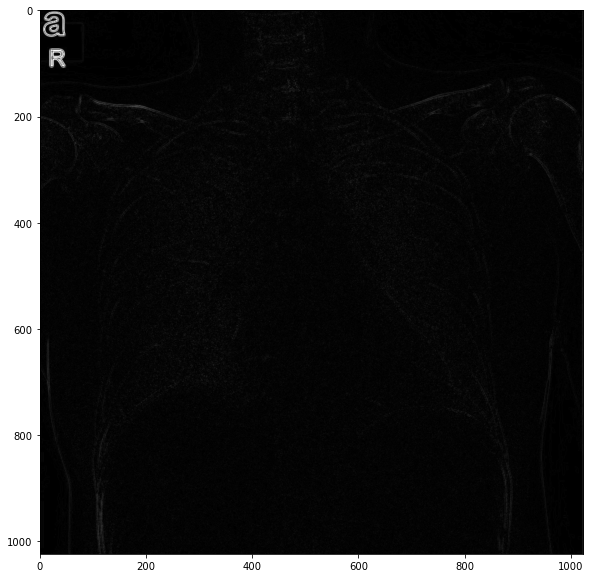

In [11]:
display_img(abs_laplaced_img)

# LAPLACIAN SHARPENED IMAGE

In [12]:
sharpened_img=img+abs_laplaced_img

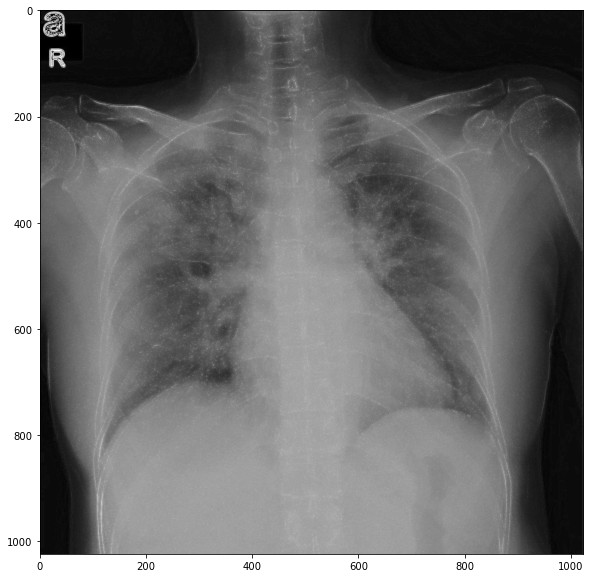

In [13]:
display_img(sharpened_img)

# SOBEL GRADIENT OF ORIGINAL IMAGE

In [14]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

In [15]:
sobel_src=cv2.GaussianBlur(img,(3,3),0)

In [16]:
# Gradient-X 
grad_x = cv2.Sobel(sobel_src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [17]:
#Gradient-Y
grad_y = cv2.Sobel(sobel_src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [18]:
abs_grad_x=cv2.convertScaleAbs(grad_x)
abs_grad_y=cv2.convertScaleAbs(grad_y)

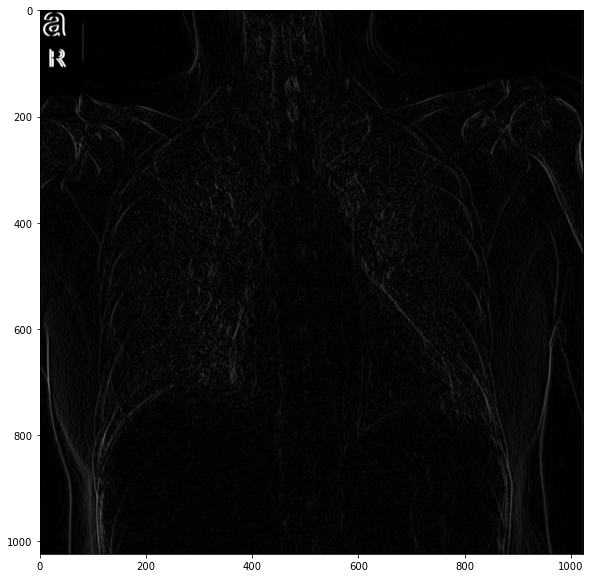

In [19]:
display_img(abs_grad_x)

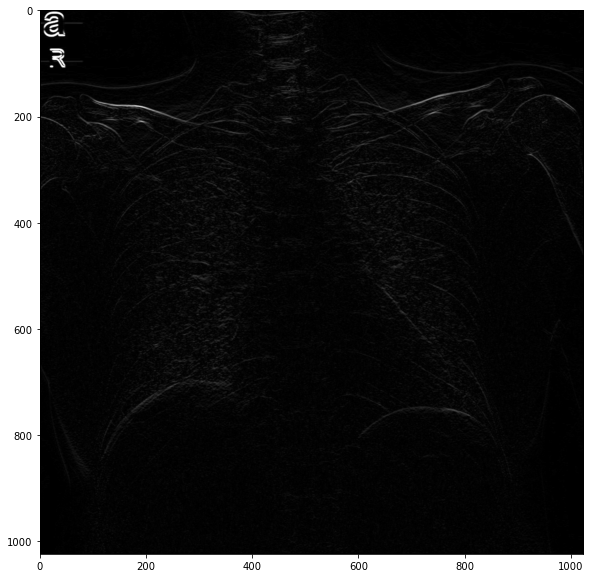

In [20]:
display_img(abs_grad_y)

In [21]:
sobel_grad=cv2.addWeighted(abs_grad_x,0.2,abs_grad_y,0.8,0)

In [22]:
sobel_img=sobel_grad+img

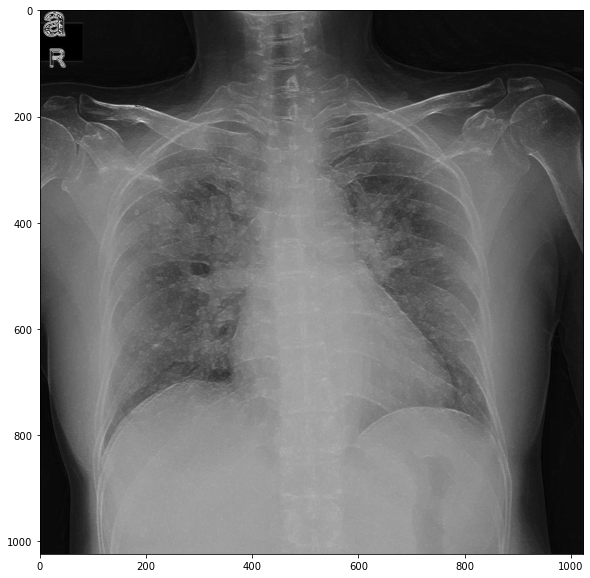

In [23]:
display_img(sobel_img)

# WIENER FILTER APPLIED TO SOBEL IMAGE TO OBTAIN SMOOTHENED IMAGE

In [24]:
def wiener_filter(img,kernel,K):
    kernel/=np.sum(kernel)
    dummy=np.copy(img)
    dummy=np.fft.fft2(dummy)
    kernel=np.fft.fft2(kernel,s=img.shape)
    kernel=np.conj(kernel)/(np.abs(kernel)**2 + K)
    dummy=dummy*kernel
    dummy=np.abs(np.fft.ifft2(dummy))
    
    return dummy

In [25]:
blurred_img=cv2.GaussianBlur(sobel_img,(5,5),7)

In [26]:
# Apply Wiener Filter

kernel=cv2.getGaussianKernel(ksize=3,sigma=10)
wiener_filtered_img=wiener_filter(blurred_img,kernel,K=10)

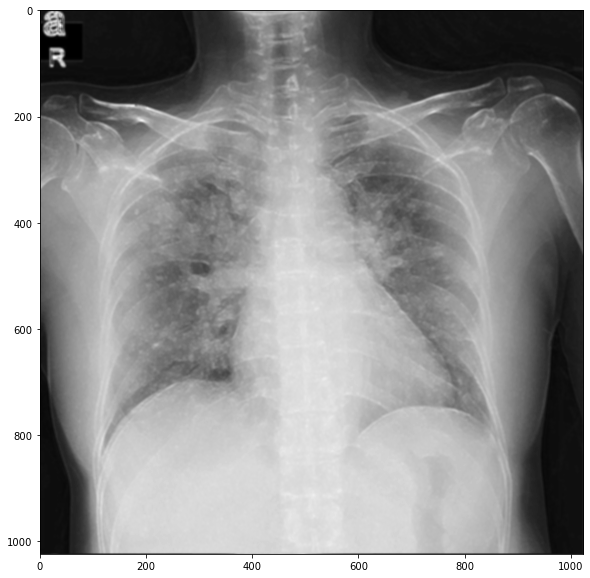

In [27]:
display_img(wiener_filtered_img)

# PRODUCT OF SHARPENED AND SMOOTHENED IMAGE

In [28]:
product_img=sharpened_img*wiener_filtered_img

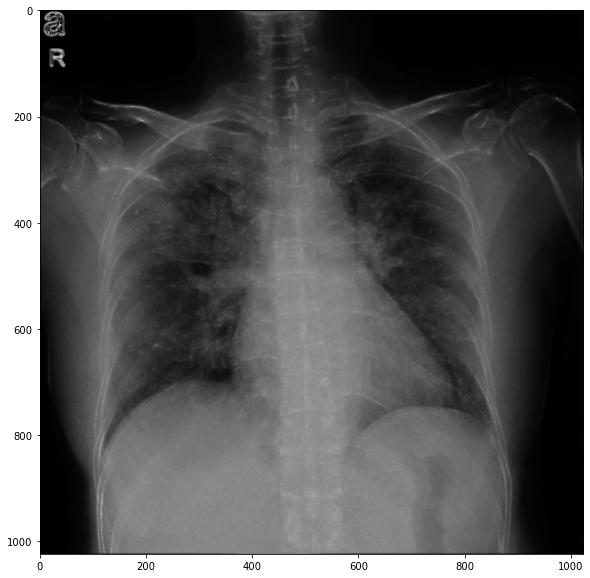

In [29]:
display_img(product_img)

# POWER LAW TRANSFORMATION

In [30]:
# Apply gamma correction. 
gamma=0.3
gamma_corrected = np.array(255*(product_img / 255) ** gamma, dtype = 'uint8')

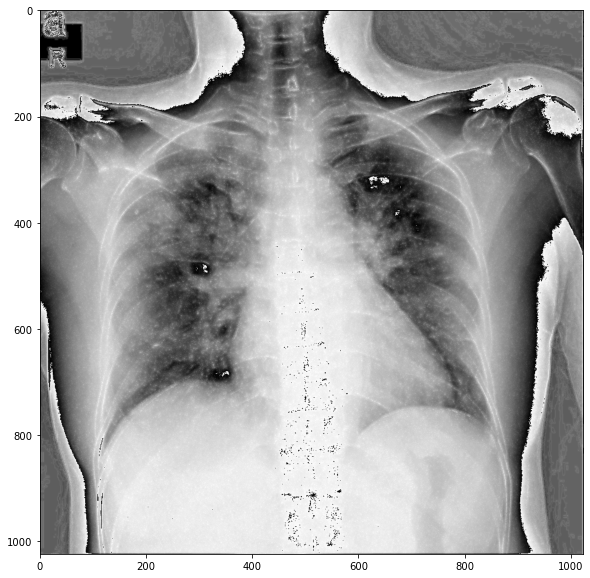

In [31]:
display_img(gamma_corrected)

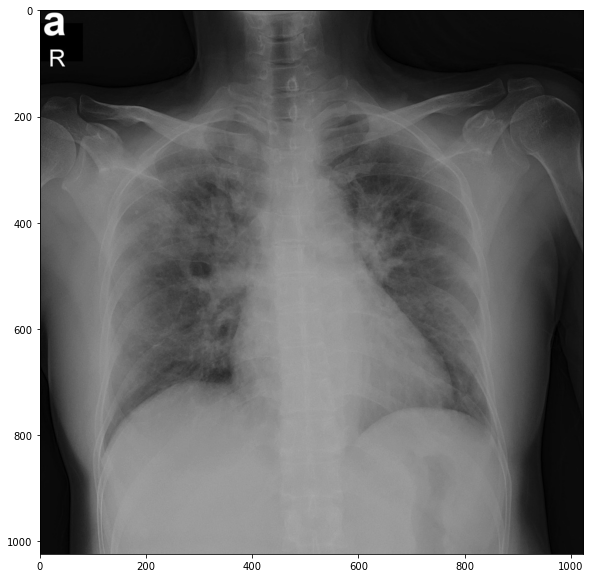

In [32]:
display_img(img)